**SPECTOGRAMS CLASSIFICATION - CNN MODELS**

**DESCRIPTION**

*HAVE PRE-PROCESSED THE AUDIO FILES.*
* CONVERTED THE AUDIO FILES TO SPECTOGRAM IMAGES AND TAKEN AS A SEPERATE DATASET
* THESE IMAGES ARE AUGMENTED AND HAVE BEEN TRAINED BY A CUSTOMIZED CNN MODEL FOR 20 EPOCHS
* THE TRAINING ACCURACY IS - 52%
* THE VALIDATION TEST ACCURACY HAD BEEN 64% WHICH IS HIGHEST AMONG ALL CUSTOMIZED MODELS USED FOR SPECTOGRAMS IMAGE DATASET
* CORRECTLY PREDICTED CLASSES IN VALIDATION DATASET IS 288/1094
* PLANT SOUND PREDICTIONS OBSERVATIONS - ORIGINAL PLANT SOUNDS ARE NOT PREDICTED CORRECTLY. SOUNDS ARE WRONGLY LABELLED, BUT ATLEAST THE MODEL IS TRYING TO PREDICT
* GREENHOUSE NOISES ARE PREDICTED CORRECTLY

**PROBLEM**
* LOW ACCURACY
* NOISES ARE PREDICTED CORRECTLY BUT NOT ACTUAL PLANT SOUNDS CLASSES
* MODEL NOT LEARNING PROPERLY AS THE VALIDATION ACCURACY DURING TRAINING REMAINS 0 IN SOME EPOCHS.

**CAN DO IMPROVEMENTS**
* CAN MAKE SURE THE ASPECT RATIO OF INPUT REMAINS UNCHANGED.
* CAN INCREASE COMPLEXITY OF MODEL THOUGH IT TAKES A LOT OF TIME.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spectogram-images/spectogram/Spectograms/Tomato Cut/id_133_sound_12.png
/kaggle/input/spectogram-images/spectogram/Spectograms/Tomato Cut/id_203_sound_32.png
/kaggle/input/spectogram-images/spectogram/Spectograms/Tomato Cut/id_183_sound_7.png
/kaggle/input/spectogram-images/spectogram/Spectograms/Tomato Cut/id_193_sound_17.png
/kaggle/input/spectogram-images/spectogram/Spectograms/Tomato Cut/id_197_sound_17.png
/kaggle/input/spectogram-images/spectogram/Spectograms/Tomato Cut/id_239_sound_23.png
/kaggle/input/spectogram-images/spectogram/Spectograms/Tomato Cut/id_131_sound_29.png
/kaggle/input/spectogram-images/spectogram/Spectograms/Tomato Cut/id_175_sound_2.png
/kaggle/input/spectogram-images/spectogram/Spectograms/Tomato Cut/id_137_sound_8.png
/kaggle/input/spectogram-images/spectogram/Spectograms/Tomato Cut/id_133_sound_15.png
/kaggle/input/spectogram-images/spectogram/Spectograms/Tomato Cut/id_193_sound_11.png
/kaggle/input/spectogram-images/spectogram/Spectograms/To

In [32]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,AveragePooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization
from keras.regularizers import l2

In [33]:
base_dir = '/kaggle/input/spectogram-images/spectogram/Spectograms'

In [61]:
import tensorflow as tf
image = tf.io.read_file('/kaggle/input/spectogram-images/spectogram/Spectograms/Empty Pot/id_0_sound_981.png')
image = tf.image.decode_image(image)
height, width, channels = image.shape

print(f"Width: {width}, Height: {height}, Channels: {channels}")


Width: 2000, Height: 400, Channels: 4


In [34]:
# Image parameters
img_height = 128
img_width = 128
batch_size = 32
num_classes = 4  

In [35]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Reserve 20% for validation
)

In [36]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 4383 images belonging to 6 classes.


In [37]:
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1094 images belonging to 6 classes.


In [38]:
num_classes = 6  

**(TRAINING WITH NOISE FILES AND ORIGINAL PLANT SOUNDS)**

In [39]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])


In [44]:
# Compile the model
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [45]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.3577 - loss: 1.9964 - val_accuracy: 0.2812 - val_loss: 3.9208
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.5312 - loss: 1.5789 - val_accuracy: 0.1667 - val_loss: 5.3993
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.4393 - loss: 1.7250 - val_accuracy: 0.4182 - val_loss: 1.8268
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.4688 - loss: 1.5092 - val_accuracy: 0.3333 - val_loss: 1.7474
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.4553 - loss: 1.6166 - val_accuracy: 0.5248 - val_loss: 1.4411
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.4375 - loss: 1.6698 - val_accuracy: 0.1667 - val_loss: 1.7326
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.4892 - loss: 1.4946 - val_accuracy: 0.5579 - val_loss: 1.3433
Epoch 8/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.2812 - loss: 1.7719 - val_

In [46]:
model.save('spectrogram_cnn_model.h5')

Text(0.5, 1.0, 'Training and Validation Accuracy')

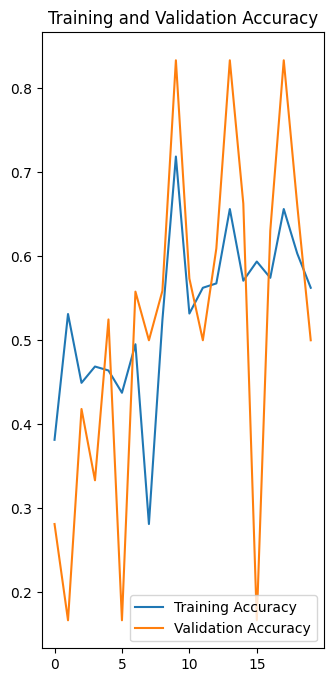

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


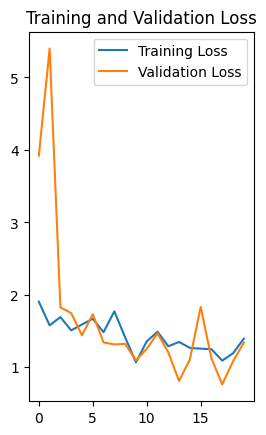

In [48]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


35/35 ━━━━━━━━━━━━━━━━━━━━ 34s 962ms/step - accuracy: 0.6491 - loss: 1.1015
Validation Loss: 1.1315847635269165
Validation Accuracy: 0.6252285242080688


In [50]:
# Get predictions on the validation data
predictions = model.predict(validation_generator)

# The predictions are probabilities (since we used softmax), 
# so we take the argmax to get the predicted class
predicted_classes = np.argmax(predictions, axis=1)


35/35 ━━━━━━━━━━━━━━━━━━━━ 33s 940ms/step


In [51]:
predicted_classes

array([0, 0, 5, ..., 0, 0, 0])

In [53]:
# Get predictions from the model
predictions = model.predict(validation_generator)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels from the validation generator
true_classes = validation_generator.classes

# Compare predicted labels with true labels
correct_predictions = np.sum(predicted_classes == true_classes)

# Get the total number of predictions
total_predictions = len(true_classes)

# Print the number of correct predictions
print(f"Correct Predictions: {correct_predictions} / {total_predictions}")

# Optional: Calculate the accuracy
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.2%}")


35/35 ━━━━━━━━━━━━━━━━━━━━ 32s 919ms/step
Correct Predictions: 288 / 1094
Accuracy: 26.33%


In [54]:
from tensorflow.keras.preprocessing import image

# Load and preprocess new image
img_path = '/kaggle/input/spectogram-images/spectogram/Spectograms/Greenhouse Noises/id_0_sound_448.png'  # Path to your new image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dims for batch

# Preprocess the image (rescale as in training)
img_array /= 255.0

# Predict the class
pred = model.predict(img_array)
predicted_class = np.argmax(pred, axis=1)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [56]:
# Assuming you are using validation_generator or train_generator (used to load your data)
class_labels = list(validation_generator.class_indices.keys())  # Or train_generator, depending on your setup


In [57]:
print(f"Predicted Class: {class_labels[predicted_class[0]]}")

Predicted Class: Greenhouse Noises


**PLANT SOUND PREDICTIONS OBSERVATIONS - GREENHOUSE NOISES ARE PREDICTED CORRECTLY AS SEEN ABOVE**

In [58]:
###### PREDICTIONS - 2

from tensorflow.keras.preprocessing import image

# Load and preprocess new image
img_path = '/kaggle/input/spectogram-images/spectogram/Spectograms/Tobacco Cut/id_155_sound_17.png'  # Path to your new image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dims for batch

# Preprocess the image (rescale as in training)
img_array /= 255.0

# Predict the class
pred = model.predict(img_array)
predicted_class = np.argmax(pred, axis=1)

class_labels = list(validation_generator.class_indices.keys()) 

print(f"Predicted Class: {class_labels[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class: Tomato Dry


**PLANT SOUND PREDICTIONS OBSERVATIONS - ORIGINAL PLANT SOUNDS ARE NOT PREDICTED CORRECTLY AS SEEN ABOVE. SOUNDS ARE WRONGLY LABELLED.**